 Importing the library


In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from operator import attrgetter
import datetime as dt
import matplotlib.colors as mcolors
from IPython.display import display
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import psycopg2
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error


warnings.filterwarnings("ignore")
%matplotlib inline



In [3]:

pip install sqlalchemy


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install ipython-sql

Note: you may need to restart the kernel to use updated packages.


Loading data from SQL

In [7]:
%load_ext sql


In [8]:
import psycopg2
hostname='localhost'
database='ECOM'
username='postgres'
pwd='123'
port_id=5432
conn=None
cur=None
try: 
    conn=psycopg2.connect(
        host=hostname,
        dbname=database,
        user=username,
        password=pwd,
        port=port_id)
    cur=conn.cursor()
    cur.execute('SELECT * FROM data')
    cur.fetchall()
    conn.commit()

except Exception as error:
    print(error)
    
    

In [9]:
cur.execute('SELECT * FROM data')
cur.fetchall()
conn.commit()

In [10]:

data=pd.read_sql('SELECT * FROM DATA',conn)
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,requested_days,delivered_days
0,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12-01-2010 08:34,1.69,13047,United Kingdom,2,2
1,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,12-01-2010 08:34,2.10,13047,United Kingdom,0,7
2,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,12-01-2010 08:34,2.10,13047,United Kingdom,1,5
3,536667,79321,CHILLI LIGHTS,4,12-02-2010 12:09,4.95,15260,United Kingdom,3,3
4,536367,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,8,12-01-2010 08:34,3.75,13047,United Kingdom,5,3
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-09-2011 12:50,0.85,12680,France,3,3
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12-09-2011 12:50,2.10,12680,France,4,2
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-2011 12:50,4.15,12680,France,3,7
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-2011 12:50,4.15,12680,France,4,6


 Data Preprocessing

In [11]:

#1. Checking Null values
data.isnull().sum()

InvoiceNo              0
StockCode              0
Description         1454
Quantity               0
InvoiceDate            0
UnitPrice              0
CustomerID        135080
Country                0
requested_days         0
delivered_days         0
dtype: int64

In [12]:
# deleting Description Name which is having nullvalues
data.dropna(subset=['Description'],how='any',inplace= True)


In [13]:
data['CustomerID'] = pd.to_numeric(data['CustomerID'], errors='coerce')
data["CustomerID"] = data["CustomerID"].fillna(value=data["CustomerID"].mean())


In [14]:
# checking the type of dataset 
data.dtypes

InvoiceNo          object
StockCode          object
Description        object
Quantity            int64
InvoiceDate        object
UnitPrice         float64
CustomerID        float64
Country            object
requested_days      int64
delivered_days      int64
dtype: object

In [15]:
data['InvoiceNo']=data.InvoiceNo.astype(str).str.replace('C', '')
data['InvoiceNo']=data.InvoiceNo.astype(str).str.replace('A', '')
data.drop(data.index[data['Country'] == 'Unspecified'], inplace=True)
data['InvoiceDate']=pd.to_datetime(data["InvoiceDate"])
data['InvoiceNo']=data['InvoiceNo'].astype(int)
data['CustomerID']=data['CustomerID'].astype(float)
data['Quantity']=data['Quantity'].astype(float)
data['Quantity'] = data[data['Quantity'] > 0]['Quantity']
data['Quantity'] = data['Quantity'].replace(np.nan, 0)

data.isnull().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
requested_days    0
delivered_days    0
dtype: int64

In [16]:
data.dtypes

InvoiceNo                  int32
StockCode                 object
Description               object
Quantity                 float64
InvoiceDate       datetime64[ns]
UnitPrice                float64
CustomerID               float64
Country                   object
requested_days             int64
delivered_days             int64
dtype: object

In [17]:
##adding one more column as total price
data['TotalPrice'] = data['UnitPrice'] * data['Quantity']

data.isnull().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
requested_days    0
delivered_days    0
TotalPrice        0
dtype: int64

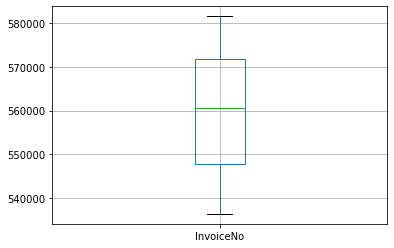

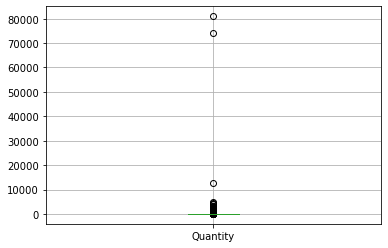

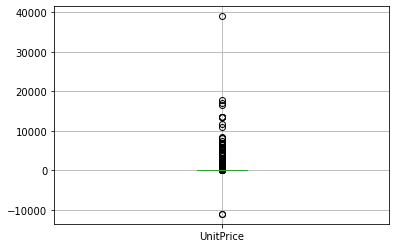

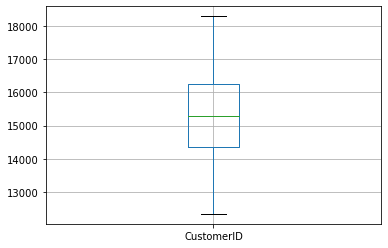

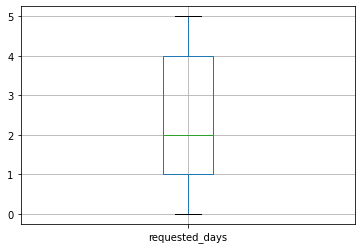

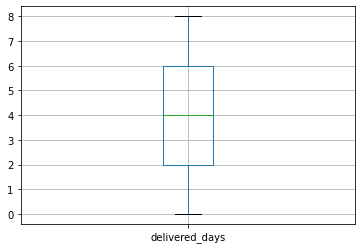

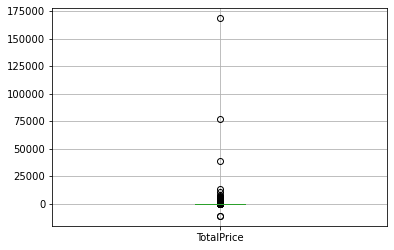

In [18]:
#checking for outliers
#checking for outliers
for column in data._get_numeric_data():
    plt.figure()
    data.boxplot([column])


In [19]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,requested_days,delivered_days,TotalPrice
0,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32.0,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2,2,54.08
1,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6.0,2010-12-01 08:34:00,2.10,13047.0,United Kingdom,0,7,12.60
2,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6.0,2010-12-01 08:34:00,2.10,13047.0,United Kingdom,1,5,12.60
3,536667,79321,CHILLI LIGHTS,4.0,2010-12-02 12:09:00,4.95,15260.0,United Kingdom,3,3,19.80
4,536367,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,8.0,2010-12-01 08:34:00,3.75,13047.0,United Kingdom,5,3,30.00
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,2011-12-09 12:50:00,0.85,12680.0,France,3,3,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,2011-12-09 12:50:00,2.10,12680.0,France,4,2,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,2011-12-09 12:50:00,4.15,12680.0,France,3,7,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,2011-12-09 12:50:00,4.15,12680.0,France,4,6,16.60


In [20]:

data['logistic_performance_indicator']=data['requested_days']/data['delivered_days']*100
data.dropna(subset=['logistic_performance_indicator'],how='any',inplace= True)

# Replace infinite updated data with nan
data.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
data.dropna(inplace=True)
(data)


data.isnull().sum()

InvoiceNo                         0
StockCode                         0
Description                       0
Quantity                          0
InvoiceDate                       0
UnitPrice                         0
CustomerID                        0
Country                           0
requested_days                    0
delivered_days                    0
TotalPrice                        0
logistic_performance_indicator    0
dtype: int64

In [21]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,requested_days,delivered_days,TotalPrice,logistic_performance_indicator
0,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32.0,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2,2,54.08,100.000000
1,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6.0,2010-12-01 08:34:00,2.10,13047.0,United Kingdom,0,7,12.60,0.000000
2,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6.0,2010-12-01 08:34:00,2.10,13047.0,United Kingdom,1,5,12.60,20.000000
3,536667,79321,CHILLI LIGHTS,4.0,2010-12-02 12:09:00,4.95,15260.0,United Kingdom,3,3,19.80,100.000000
4,536367,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,8.0,2010-12-01 08:34:00,3.75,13047.0,United Kingdom,5,3,30.00,166.666667
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,2011-12-09 12:50:00,0.85,12680.0,France,3,3,10.20,100.000000
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,2011-12-09 12:50:00,2.10,12680.0,France,4,2,12.60,200.000000
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,2011-12-09 12:50:00,4.15,12680.0,France,3,7,16.60,42.857143
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,2011-12-09 12:50:00,4.15,12680.0,France,4,6,16.60,66.666667


In [22]:
data.to_csv('finaldata_python.csv') 


In [23]:
Final_data=pd.read_csv('finaldata_python.csv', encoding= 'unicode_escape')
Final_data.drop(columns=Final_data.columns[0], axis=1, inplace=True)
Final_data['InvoiceNo']=Final_data['InvoiceNo'].astype(int)
Final_data['CustomerID']=Final_data['CustomerID'].astype(int)
Final_data['Year'] = pd.DatetimeIndex(Final_data['InvoiceDate']).year
Final_data['Month'] = pd.DatetimeIndex(Final_data['InvoiceDate']).month
Final_data.dropna(subset=['logistic_performance_indicator'],how='any',inplace= True)

Final_data


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,requested_days,delivered_days,TotalPrice,logistic_performance_indicator,Year,Month
0,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32.0,2010-12-01 08:34:00,1.69,13047,United Kingdom,2,2,54.08,100.000000,2010,12
1,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6.0,2010-12-01 08:34:00,2.10,13047,United Kingdom,0,7,12.60,0.000000,2010,12
2,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6.0,2010-12-01 08:34:00,2.10,13047,United Kingdom,1,5,12.60,20.000000,2010,12
3,536667,79321,CHILLI LIGHTS,4.0,2010-12-02 12:09:00,4.95,15260,United Kingdom,3,3,19.80,100.000000,2010,12
4,536367,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,8.0,2010-12-01 08:34:00,3.75,13047,United Kingdom,5,3,30.00,166.666667,2010,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479746,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,2011-12-09 12:50:00,0.85,12680,France,3,3,10.20,100.000000,2011,12
479747,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,2011-12-09 12:50:00,2.10,12680,France,4,2,12.60,200.000000,2011,12
479748,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,2011-12-09 12:50:00,4.15,12680,France,3,7,16.60,42.857143,2011,12
479749,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,2011-12-09 12:50:00,4.15,12680,France,4,6,16.60,66.666667,2011,12


 EDA

In [24]:
x = Final_data.groupby(['Description'], as_index=False).agg(SALE=('TotalPrice','sum'))
y= Final_data.groupby(['Description'], as_index=False).agg(Count=('Description','count'))

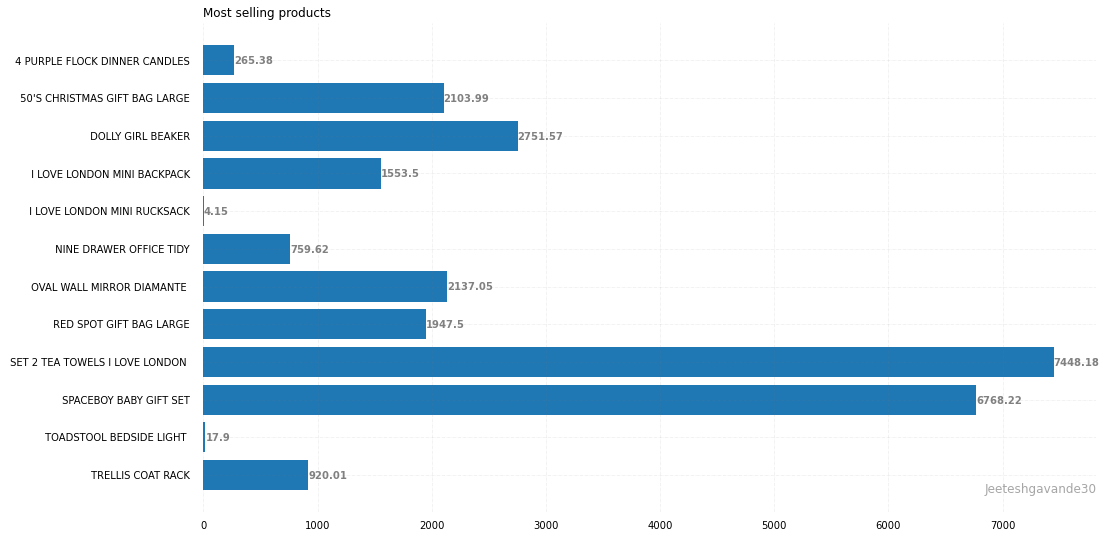

In [25]:
#Most selling products

# Read CSV into pandas

product = x['Description'].head(12)
sale = x['SALE'].head(12)

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

# Horizontal Bar Plot
ax.barh(product, sale)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

# Add Plot Title
ax.set_title('Most selling products',
			loc ='left', )

# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

# Show Plot
plt.show()



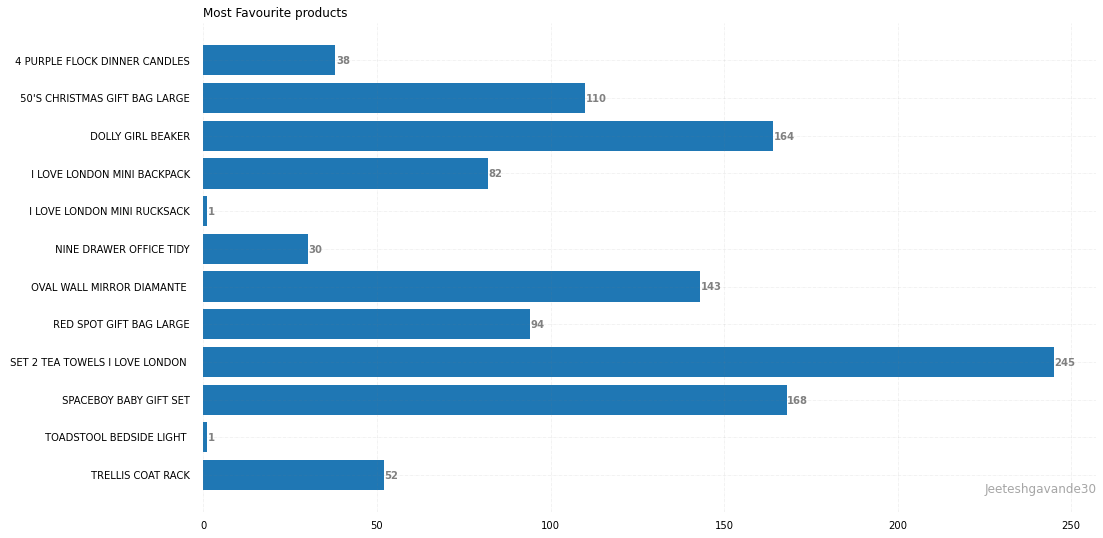

In [26]:
#Most Favourite products
import pandas as pd

# Read CSV into pandas

product = y['Description'].head(12)
sale = y['Count'].head(12)

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

# Horizontal Bar Plot
ax.barh(product, sale)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

# Add Plot Title
ax.set_title('Most Favourite products',
			loc ='left', )

# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

# Show Plot
plt.show()



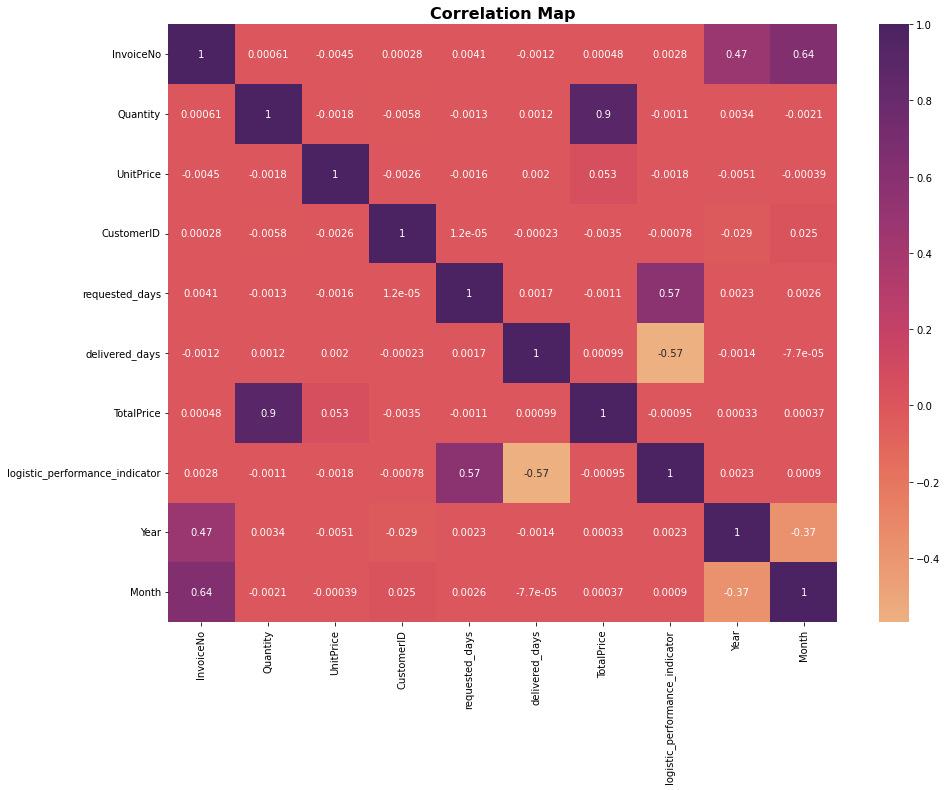

In [27]:


#correlation table
correlation=Final_data.corr()
plt.figure(figsize=(15,11))
sns.heatmap(Final_data.corr(), cmap='flare', annot = True)
plt.title("Correlation Map", fontweight = "bold", fontsize=16)
plt.show()

In [28]:
##grouping necessary data to predict
df = Final_data.groupby(['Country','Year','Month'], as_index=False).agg(Logistic_performance=('logistic_performance_indicator','mean'),SALE=('TotalPrice','sum'))
df
#Final_data.groupby(['Country'],as_index=False).agg(Logistic_performance=('logistic_performance_indicator','mean'))

,Country,Year,Month,Logistic_performance,SALE
0,Australia,2010,12,77.118347,965.350
1,Australia,2011,1,79.440901,8265.130
2,Australia,2011,2,81.229656,12970.380
3,Australia,2011,3,82.415675,14407.950
4,Australia,2011,4,146.928571,641.000
...,...,...,...,...,...
301,United Kingdom,2011,8,85.855034,525460.480
302,United Kingdom,2011,9,84.137439,802449.351
303,United Kingdom,2011,10,85.977507,842486.550
304,United Kingdom,2011,11,85.111569,1185428.600


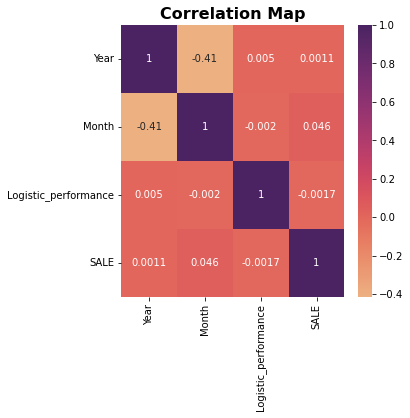

In [29]:

#correlation table
correlation=df.corr()
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), cmap='flare', annot = True)
plt.title("Correlation Map", fontweight = "bold", fontsize=16)
plt.show()


Feature selections


In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split



In [31]:
#as we can see in correlation table, experience & current job years columns are highly related than others.there might be repeated values in row values in dataset. SO data transformation is required ie.PCA
#formula is (value-mean)/standard deviation
columns=["SALE","Logistic_performance"]
dataPCA=df[columns]
transformedDF=(dataPCA-dataPCA.mean(axis=0))/dataPCA.std()
transformedDF

,SALE,Logistic_performance
0,-0.228914,-0.334861
1,-0.173347,-0.238240
2,-0.137530,-0.163825
3,-0.126587,-0.114485
4,-0.231383,2.569347
...,...,...
301,3.763611,0.028598
302,5.872086,-0.042857
303,6.176854,0.033693
304,8.787374,-0.002332


In [32]:
#applying PCA(principle component analysis) method to transformed DF
pca=PCA(n_components=2)
PC=pca.fit_transform(transformedDF)
principle=pd.DataFrame(data=PC,columns=['PC.SALE','PC.Logistic_performance'])
principle.head()

,PC.SALE,PC.Logistic_performance
0,-0.074916,-0.398649
1,-0.045886,-0.291036
2,-0.018593,-0.213090
3,0.008558,-0.170464
4,1.980415,1.653190


In [33]:
#adding PCA columns into dataset
df=pd.concat([df,principle],axis=1)
df.head()

,Country,Year,Month,Logistic_performance,SALE,PC.SALE,PC.Logistic_performance
0,Australia,2010,12,77.118347,965.35,-0.074916,-0.398649
1,Australia,2011,1,79.440901,8265.13,-0.045886,-0.291036
2,Australia,2011,2,81.229656,12970.38,-0.018593,-0.213090
3,Australia,2011,3,82.415675,14407.95,0.008558,-0.170464
4,Australia,2011,4,146.928571,641.00,1.980415,1.653190


In [34]:
#changing categorical values into numerical for training & test datasets by label encoder
cat_col=['Country']
label_encoder=LabelEncoder()
for col in cat_col:
    df[col]=label_encoder.fit_transform(df[col])
df['Country']=df['Country']+1
df

,Country,Year,Month,Logistic_performance,SALE,PC.SALE,PC.Logistic_performance
0,1,2010,12,77.118347,965.350,-0.074916,-0.398649
1,1,2011,1,79.440901,8265.130,-0.045886,-0.291036
2,1,2011,2,81.229656,12970.380,-0.018593,-0.213090
3,1,2011,3,82.415675,14407.950,0.008558,-0.170464
4,1,2011,4,146.928571,641.000,1.980415,1.653190
...,...,...,...,...,...,...,...
301,37,2011,8,85.855034,525460.480,-2.641053,2.681496
302,37,2011,9,84.137439,802449.351,-4.182496,4.121887
303,37,2011,10,85.977507,842486.550,-4.343871,4.391520
304,37,2011,11,85.111569,1185428.600,-6.215260,6.211963


 Model bulding for sales prediction



1. Linear Regression 


In [140]:
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square


In [ ]:
#Splitting data
X=df[["Country","Year","Month"]].values
y=df[["SALE"]].values



X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


In [141]:
##SALES
from sklearn.linear_model import LinearRegression
from sklearn import metrics

LR=LinearRegression()
LR.fit(X_train,y_train)
y_prediction=LR.predict(X_test)#prediction using test sample

from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error
print('LinearRegression Model validation score for sales prediction:', LR.score(X_test,y_test)*1000)
print('R2 score of  LinearRegression model for sales prediction: ', r2_score(y_test, y_prediction)*1000)
print("RMSE value of LinearRegression for sales prediction :",sqrt(mean_squared_error(y_test, y_prediction)))
print("MSE value of LinearRegression for sales prediction :",mean_squared_error(y_test, y_prediction))
print("Mean absoulte error of LinearRegression for sales prediction :",mean_absolute_error(y_test, y_prediction))

results_df = pd.DataFrame(data=[["Linear Regression ", *evaluate(y_test, y_prediction) ]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df




LinearRegression Model validation score for sales prediction: 59.20465244018735
R2 score of  LinearRegression model for sales prediction:  59.20465244018735
RMSE value of LinearRegression for sales prediction : 111915.92613282298
MSE value of LinearRegression for sales prediction : 12525174522.16749
Mean absoulte error of LinearRegression for sales prediction : 59784.77476304633


,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,59784.77,12525174522.17,111915.93,0.06


In [142]:
#square root for sales
sqrt_x= np.sqrt(X+1)
sqrt_y = np.sqrt(y)
  
scalar = StandardScaler() 
  
scalar.fit(sqrt_x) 
scaled_data_sqrt = scalar.transform(sqrt_x) 
X_train_sqrt, X_test_sqrt, y_train_sqrt, y_test_sqrt = train_test_split(scaled_data_sqrt , sqrt_y, test_size=0.3, random_state=200)



In [143]:
#square root for linear regression
lm = LinearRegression()
lm.fit(X_train_sqrt,y_train_sqrt)

print('Training accuracy=',lm.score(X_train_sqrt,y_train_sqrt))
pred = lm.predict(X_test_sqrt)


mae = metrics.mean_absolute_error(y_test_sqrt, pred)
mse = metrics.mean_squared_error(y_test_sqrt, pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test_sqrt, pred))
r2_square = metrics.r2_score(y_test_sqrt, pred)
    
print('Prediction R-Square accuracy =',r2_square)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:',rmse)

results_df1 = pd.DataFrame(data=[["Linear Regression sqrt", *evaluate(y_test_sqrt, pred) ]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df1, ignore_index=True)


Training accuracy= 0.06877572067055104
Prediction R-Square accuracy = 0.05286819508220442
MAE: 94.64770097324674
MSE: 36310.940412506716
RMSE: 190.5542978064434


Text(0.5, 0, 'Accuracy')

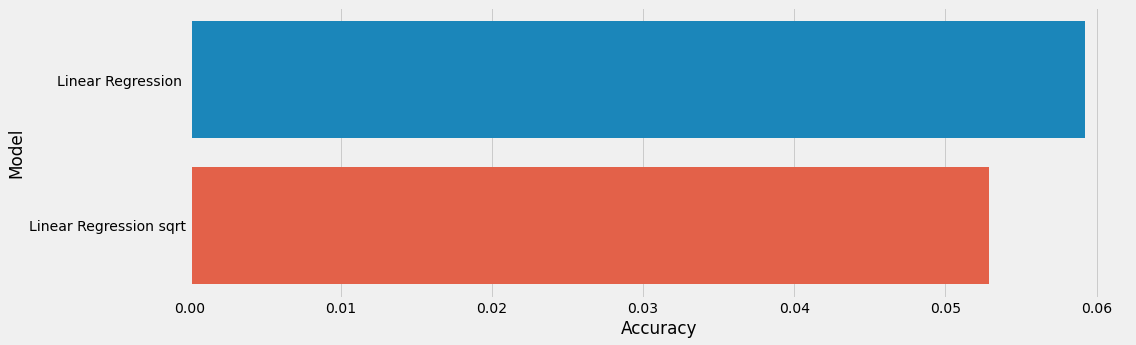

In [144]:
import seaborn as sns
fig = plt.figure(figsize =(15, 5))

sns.barplot(x="R2 Square", y="Model", data=results_df)
plt.xlabel('Accuracy')


In [145]:
#lets predicit sale
"Country","Year","Month"
"Units","SALE"
print("Total SALES ",LR.predict([[36,2012,4]])[0])


Total SALES  [105861.24200225]



2. Decision Tree Regressor 



In [146]:
##Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor()

DTR.fit(X_train,y_train)


y_prediction=DTR.predict(X_test)#prediction using test sample
print('Decision TreeRegression Model validation score for sales prediction:', DTR.score(X_train,y_train))
print('R2 score of  Decision TreeRegression model for sales prediction: ', r2_score(y_test, y_prediction))
print("RMSE value of Decision Tree Regression for sales prediction :",sqrt(mean_squared_error(y_test, y_prediction)))
print("MSE value of Decision Tree Regression for sales prediction:",mean_squared_error(y_test, y_prediction))
print("Mean absoulte error of Decision Tree Regression for sales prediction",mean_absolute_error(y_test, y_prediction))
results_df2 = pd.DataFrame(data=[["Decision TreeRegression ", *evaluate(y_test, y_prediction) ]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

results_df = results_df.append(results_df2, ignore_index=True)



Decision TreeRegression Model validation score for sales prediction: 1.0
R2 score of  Decision TreeRegression model for sales prediction:  0.9762917983127251
RMSE value of Decision Tree Regression for sales prediction : 17766.162045842753
MSE value of Decision Tree Regression for sales prediction: 315636513.8391435
Mean absoulte error of Decision Tree Regression for sales prediction 6092.688209677419


In [147]:
#square root for Decision Tree
DTR = DecisionTreeRegressor()
DTR.fit(X_train_sqrt,y_train_sqrt)


print('Training accuracy=',DTR.score(X_train_sqrt,y_train_sqrt)*100)
pred = DTR.predict(X_test_sqrt)


mae = metrics.mean_absolute_error(y_test_sqrt, pred)
mse = metrics.mean_squared_error(y_test_sqrt, pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test_sqrt, pred))
r2_square = metrics.r2_score(y_test_sqrt, pred)
    
print('Prediction R-Square accuracy =',r2_square)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:',rmse)

results_df3 = pd.DataFrame(data=[["DecisionTreeRegressor sqrt", *evaluate(y_test_sqrt, pred) ]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df3, ignore_index=True)
D=results_df2.append(results_df3, ignore_index=True)

Training accuracy= 100.0
Prediction R-Square accuracy = 0.913302445412232
MAE: 35.58624459382947
MSE: 3323.7926571579123
RMSE: 57.65234303268092


Text(0.5, 0, 'Accuracy')

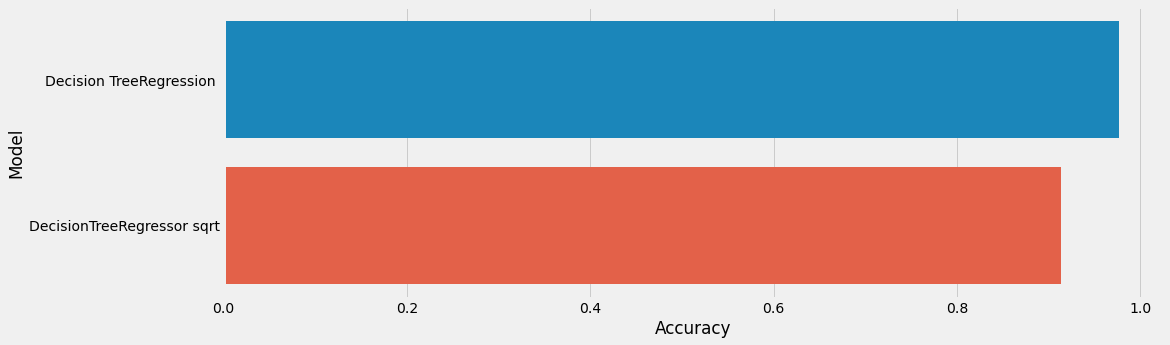

In [148]:
fig = plt.figure(figsize =(15, 5))

sns.barplot(x="R2 Square", y="Model", data=D)
plt.xlabel('Accuracy')


In [149]:
print(DTR.predict(X_test))


[736.67572242 736.67572242 736.67572242 736.67572242 736.67572242
   0.         736.67572242 917.87066082 736.67572242 736.67572242
   0.         736.67572242 917.87066082 736.67572242 736.67572242
 736.67572242 736.67572242 736.67572242 917.87066082 736.67572242
 736.67572242 736.67572242 736.67572242 736.67572242 736.67572242
 736.67572242   0.         736.67572242 736.67572242 736.67572242
 917.87066082 736.67572242 736.67572242 736.67572242 736.67572242
 736.67572242 736.67572242 736.67572242 736.67572242 917.87066082
 736.67572242 736.67572242 736.67572242 736.67572242   0.
 736.67572242 736.67572242 736.67572242 736.67572242 736.67572242
 736.67572242 736.67572242 736.67572242 917.87066082 736.67572242
 736.67572242 736.67572242 736.67572242 736.67572242 736.67572242
 736.67572242 736.67572242]


In [150]:
#lets predicit sale
"Country","Year","Month"
"Units","SALE"
print("Predicted Sales ",DTR.predict([[36,2012,4]])[0])


Predicted Sales  736.6757224179443


In [151]:
#import lazypredict
#from lazypredict.Supervised import LazyClassifier
#from sklearn.model_selection import train_test_split


#clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
#models,predictions = clf.fit(X_train, X_test, y_train, y_test)

#print(models)


3. GradientBoostingRegressor 
 

In [152]:
from sklearn.ensemble import GradientBoostingRegressor 


GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
y_prediction=GBR.predict(X_test)#prediction using test sample

print('GradientBoostingRegressor Model validation score for sales prediction:', GBR.score(X_train,y_train))

print('R2 score of  GradientBoostingRegressor: ', r2_score(y_test, y_prediction))
print("RMSE value of GradientBoostingRegressor :",sqrt(mean_squared_error(y_test, y_prediction)))
print("MSE value of GradientBoostingRegressor():",mean_squared_error(y_test, y_prediction))
print("Mean absoulte error of GradientBoostingRegressor()",mean_absolute_error(y_test, y_prediction))
results_df4 = pd.DataFrame(data=[[" GradientBoostingRegressor ", *evaluate(y_test, y_prediction) ]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

results_df = results_df.append(results_df4, ignore_index=True)


GradientBoostingRegressor Model validation score for sales prediction: 0.9993683369663092
R2 score of  GradientBoostingRegressor:  0.977344666161835
RMSE value of GradientBoostingRegressor : 17367.189596962122
MSE value of GradientBoostingRegressor(): 301619274.4968294
Mean absoulte error of GradientBoostingRegressor() 5742.457655402642


In [153]:
#square root for Decision Tree
GBR=GradientBoostingRegressor()
GBR.fit(X_train_sqrt,y_train_sqrt)


print('Training accuracy=',GBR.score(X_train_sqrt,y_train_sqrt)*100)
pred = GBR.predict(X_test_sqrt)


mae = metrics.mean_absolute_error(y_test_sqrt, pred)
mse = metrics.mean_squared_error(y_test_sqrt, pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test_sqrt, pred))
r2_square = metrics.r2_score(y_test_sqrt, pred)
    
print('Prediction R-Square accuracy =',r2_square)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:',rmse)

results_df5 = pd.DataFrame(data=[["GradientBoostingRegressor sqrt", *evaluate(y_test_sqrt, pred) ]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df5, ignore_index=True)
G=results_df4.append(results_df5, ignore_index=True)


Training accuracy= 98.00139106080262
Prediction R-Square accuracy = 0.9415665957243657
MAE: 26.216856604026763
MSE: 2240.2075927928786
RMSE: 47.330831313139626


Text(0.5, 0, 'Accuracy')

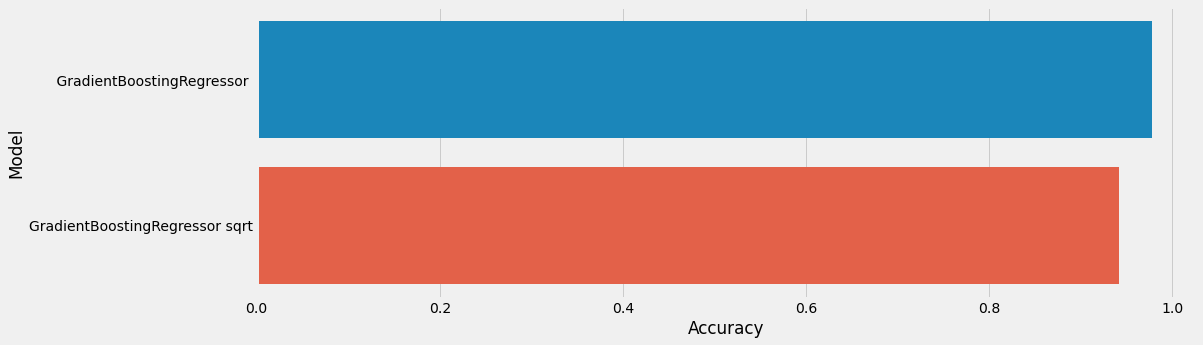

In [154]:
import seaborn as sns
fig = plt.figure(figsize =(15, 5))

sns.barplot(x="R2 Square", y="Model", data=G)
plt.xlabel('Accuracy')


In [155]:
#lets predicit Sales
"Country","Year","Month"
"Units","SALE"
print("Predicted Sales ",GBR.predict([[36,2012,4]])[0])


Predicted Sales  732.6370903515431


4.BaggingRegressor

In [156]:

from sklearn.ensemble import BaggingRegressor

BR=BaggingRegressor()

BR.fit(X_train,y_train)
y_prediction=BR.predict(X_test)#prediction using test sample


print('BaggingRegressor Model validation score for sales prediction:', BR.score(X_train,y_train))

print('R2 score of  BaggingRegressor: ', r2_score(y_test, y_prediction))
print("RMSE value of BaggingRegressor :",sqrt(mean_squared_error(y_test, y_prediction)))
print("MSE value of BaggingRegressor:",mean_squared_error(y_test, y_prediction))
print("Mean absoulte error of BaggingRegressor",mean_absolute_error(y_test, y_prediction))
results_df6 = pd.DataFrame(data=[[" BaggingRegressor ", *evaluate(y_test, y_prediction) ]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df6, ignore_index=True)



BaggingRegressor Model validation score for sales prediction: 0.9777153703257783
R2 score of  BaggingRegressor:  0.9706351045137956
RMSE value of BaggingRegressor : 19772.36150245107
MSE value of BaggingRegressor: 390946279.3836091
Mean absoulte error of BaggingRegressor 6745.297124193548


In [157]:
#square root for BaggingRegressor
BR=BaggingRegressor()
BR.fit(X_train_sqrt,y_train_sqrt)


print('Training accuracy=',BR.score(X_train_sqrt,y_train_sqrt)*100)
pred = BR.predict(X_test_sqrt)


mae = metrics.mean_absolute_error(y_test_sqrt, pred)
mse = metrics.mean_squared_error(y_test_sqrt, pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test_sqrt, pred))
r2_square = metrics.r2_score(y_test_sqrt, pred)
    
print('Prediction R-Square accuracy =',r2_square)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:',rmse)

results_df7 = pd.DataFrame(data=[["BaggingRegressor sqrt", *evaluate(y_test_sqrt, pred) ]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df7, ignore_index=True)
B=results_df6.append(results_df7, ignore_index=True)


Training accuracy= 97.11191101651141
Prediction R-Square accuracy = 0.924441199728091
MAE: 31.83793986953871
MSE: 2896.7574312974402
RMSE: 53.82153315632546


Text(0.5, 0, 'Accuracy')

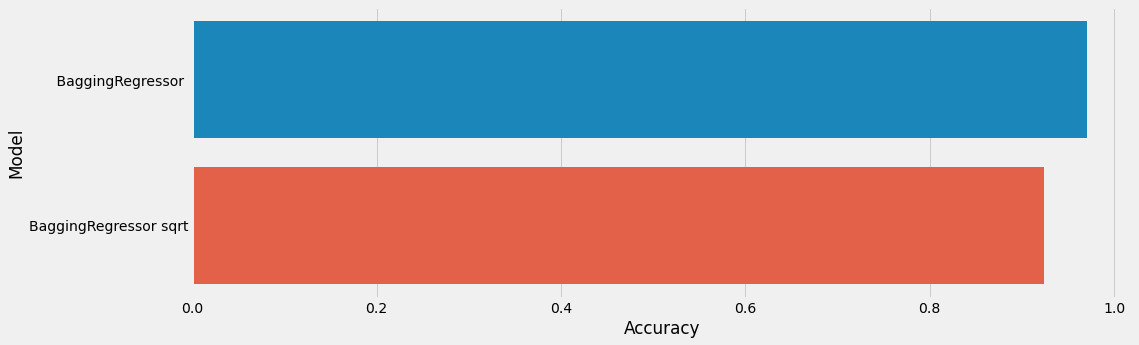

In [158]:

import seaborn as sns
fig = plt.figure(figsize =(15, 5))

sns.barplot(x="R2 Square", y="Model", data=B)
plt.xlabel('Accuracy')


5.AdaBoostRegressor

In [159]:

from sklearn.ensemble import AdaBoostRegressor

ABR=AdaBoostRegressor()

ABR.fit(X_train,y_train)
y_prediction=ABR.predict(X_test)#prediction using test sample


print('AdaBoostRegressor Model validation score for sales prediction:', ABR.score(X_train,y_train))

print('R2 score of  AdaBoostRegressor: ', r2_score(y_test, y_prediction))
print("RMSE value of AdaBoostRegressor :",sqrt(mean_squared_error(y_test, y_prediction)))
print("MSE value of AdaBoostRegressor:",mean_squared_error(y_test, y_prediction))
print("Mean absoulte error of AdaBoostRegressor",mean_absolute_error(y_test, y_prediction))
results_df8 = pd.DataFrame(data=[[" AdaBoostRegressor ", *evaluate(y_test, y_prediction) ]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df8, ignore_index=True)


AdaBoostRegressor Model validation score for sales prediction: 0.9965653073285126
R2 score of  AdaBoostRegressor:  0.980560006350952
RMSE value of AdaBoostRegressor : 16087.64120316435
MSE value of AdaBoostRegressor: 258812199.48175132
Mean absoulte error of AdaBoostRegressor 6596.151258913114


In [180]:
#square root for AdaRegressor
ABR=AdaBoostRegressor()
ABR.fit(X_train_sqrt,y_train_sqrt)


print('Training accuracy=',ABR.score(X_train_sqrt,y_train_sqrt)*100)
pred = ABR.predict(X_test_sqrt)


mae = metrics.mean_absolute_error(y_test_sqrt, pred)
mse = metrics.mean_squared_error(y_test_sqrt, pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test_sqrt, pred))
r2_square = metrics.r2_score(y_test_sqrt, pred)
    
print('Prediction R-Square accuracy =',r2_square)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:',rmse)

results_df9 = pd.DataFrame(data=[["AdaBoostRegressor sqrt", *evaluate(y_test_sqrt, pred) ]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df9, ignore_index=True)
A=results_df8.append(results_df9, ignore_index=True)

Training accuracy= 91.93542598031743
Prediction R-Square accuracy = 0.919303610076128
MAE: 36.897892821656036
MSE: 3093.7212654203286
RMSE: 55.621230347955525


Text(0.5, 0, 'Accuracy')

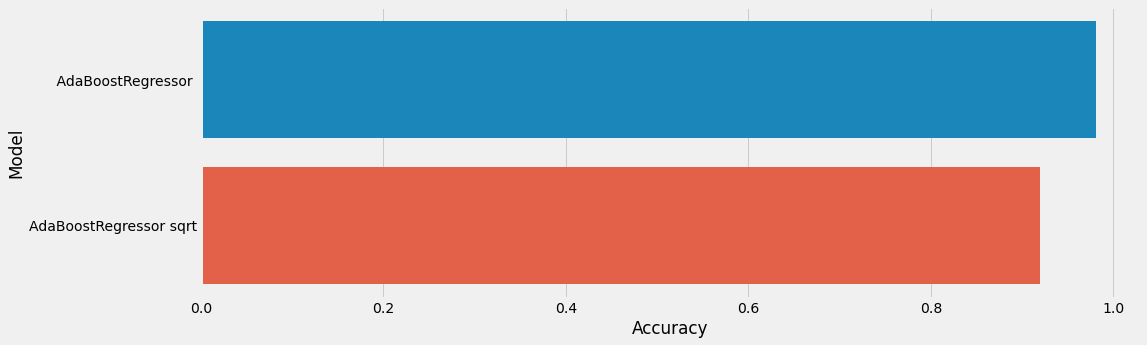

In [181]:

import seaborn as sns
fig = plt.figure(figsize =(15, 5))

sns.barplot(x="R2 Square", y="Model", data=A)
plt.xlabel('Accuracy')


6.KNeighborsRegressor


In [162]:

from sklearn.neighbors import KNeighborsRegressor

KNN=KNeighborsRegressor()

KNN.fit(X_train,y_train)
y_prediction=KNN.predict(X_test)#prediction using test sample


print('KNeighborsRegressor Model validation score for sales prediction:', KNN.score(X_train,y_train))

print('R2 score of  KNeighborsRegressor: ', r2_score(y_test, y_prediction))
print("RMSE value of KNeighborsRegressor :",sqrt(mean_squared_error(y_test, y_prediction)))
print("MSE value of KNeighborsRegressor:",mean_squared_error(y_test, y_prediction))
print("Mean absoulte error of KNeighborsRegressor",mean_absolute_error(y_test, y_prediction))
results_df10 = pd.DataFrame(data=[[" KNeighborsRegressor ", *evaluate(y_test, y_prediction) ]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df10, ignore_index=True)



KNeighborsRegressor Model validation score for sales prediction: 0.8630708271996068
R2 score of  KNeighborsRegressor:  0.8051057372897185
RMSE value of KNeighborsRegressor : 50938.2287886249
MSE value of KNeighborsRegressor: 2594703152.122295
Mean absoulte error of KNeighborsRegressor 13634.617774193552


In [163]:
#square root for KNN
KNN=KNeighborsRegressor()
KNN.fit(X_train_sqrt,y_train_sqrt)


print('Training accuracy=',KNN.score(X_train_sqrt,y_train_sqrt)*100)
pred = KNN.predict(X_test_sqrt)


mae = metrics.mean_absolute_error(y_test_sqrt, pred)
mse = metrics.mean_squared_error(y_test_sqrt, pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test_sqrt, pred))
r2_square = metrics.r2_score(y_test_sqrt, pred)
    
print('Prediction R-Square accuracy =',r2_square)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:',rmse)

results_df11 = pd.DataFrame(data=[["KNeighborsRegressor sqrt", *evaluate(y_test_sqrt, pred) ]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df11, ignore_index=True)
K=results_df10.append(results_df11, ignore_index=True)


Training accuracy= 38.398242521133184
Prediction R-Square accuracy = 0.25825542100554
MAE: 84.8777156303411
MSE: 28436.848038806333
RMSE: 168.6322864661638


Text(0.5, 0, 'Accuracy')

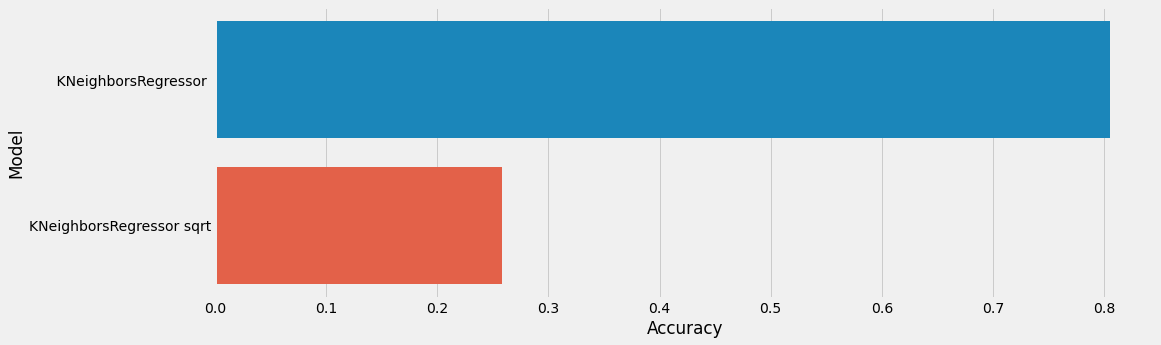

In [182]:

import seaborn as sns
fig = plt.figure(figsize =(15, 5))

sns.barplot(x="R2 Square", y="Model", data=K)
plt.xlabel('Accuracy')


In [184]:
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,59784.77,12525174522.17,111915.93,0.06
1,Linear Regression sqrt,94.65,36310.94,190.55,0.05
2,Decision TreeRegression,6092.69,315636513.84,17766.16,0.98
3,DecisionTreeRegressor sqrt,35.59,3323.79,57.65,0.91
4,GradientBoostingRegressor,5742.46,301619274.50,17367.19,0.98
5,GradientBoostingRegressor sqrt,26.22,2240.21,47.33,0.94
6,BaggingRegressor,6745.30,390946279.38,19772.36,0.97
7,BaggingRegressor sqrt,31.84,2896.76,53.82,0.92
8,AdaBoostRegressor,6596.15,258812199.48,16087.64,0.98
9,AdaBoostRegressor sqrt,37.79,3146.33,56.09,0.92


Text(0.5, 0, 'Accuracy')

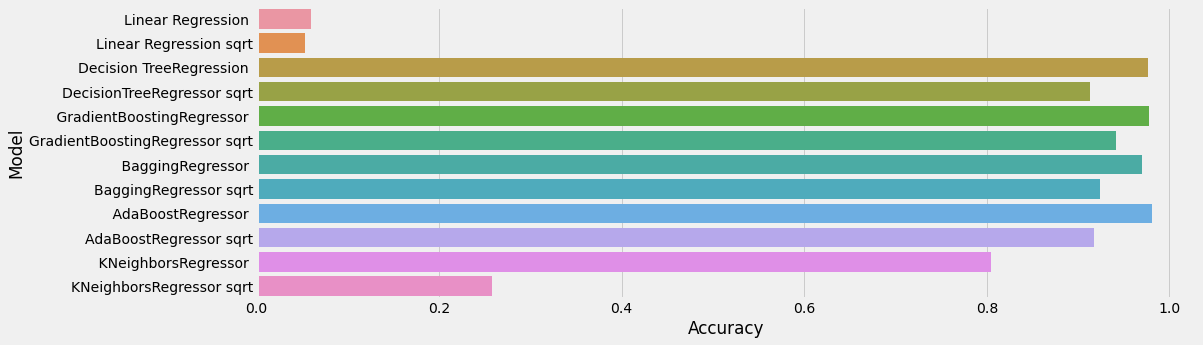

In [166]:

import seaborn as sns
fig = plt.figure(figsize =(15, 5))

sns.barplot(x="R2 Square", y="Model", data=results_df)
plt.xlabel('Accuracy')


In [167]:
##logistics
A=df[["Country","Year","Month","PC.SALE"]].values
b=df[["Logistic_performance"]].values
A_train, A_test, b_train, b_test = train_test_split( A, b, test_size=0.2, random_state=42)
LR1=LinearRegression()
LR1.fit(A_train,b_train)
b_prediction=LR1.predict(A_test)#prediction using test sample

print('LinearRegression Model validation score for logistic performance prediction:', LR1.score(A_test,b_test)*100)
print('R2 score of LinearRegression for logistic performance prediction: ', r2_score(b_test, b_prediction)*100)
print("RMSE value of LinearRegression for logistic performance prediction:",sqrt(mean_squared_error(b_test, b_prediction)))
print("MSE value of LinearRegression for logistic performance prediction:",mean_squared_error(b_test, b_prediction))
print("Mean absoulte error of LinearRegression for logistic performance prediction:",mean_absolute_error(b_test, b_prediction))
results_df_logis = pd.DataFrame(data=[["Linear Regression_logistics ", *evaluate(b_test, b_prediction) ]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df_logis

LinearRegression Model validation score for logistic performance prediction: 47.80524354062721
R2 score of LinearRegression for logistic performance prediction:  47.80524354062721
RMSE value of LinearRegression for logistic performance prediction: 15.283022865835143
MSE value of LinearRegression for logistic performance prediction: 233.57078791763982
Mean absoulte error of LinearRegression for logistic performance prediction: 10.064666093957092


,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression_logistics,10.06,233.57,15.28,0.48


In [168]:
#decision tree
DTR1=DecisionTreeRegressor()
DTR1.fit(A_train,b_train)
b_prediction=DTR1.predict(A_test)#prediction using test sample
print('Decision TreeRegression Model validation score for logistic performance  prediction:',DTR1.score(A_train,b_train))
print('R2 score of Decision TreeRegression model for logistic performance prediction: ', r2_score(b_test, b_prediction))
print("RMSE value of Decision TreeRegression model for logistic performance prediction:",sqrt(mean_squared_error(b_test, b_prediction)))
print("MSE value of Decision TreeRegression model for logistic performance prediction:",mean_squared_error(b_test, b_prediction))
print("Mean absoulte error of Decision TreeRegression model for logistic performance prediction:",mean_absolute_error(b_test, b_prediction))
results_df_logis1 = pd.DataFrame(data=[["Decision TreeRegression_logistics ", *evaluate(b_test, b_prediction) ]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df_logis = results_df_logis.append(results_df_logis1, ignore_index=True)


Decision TreeRegression Model validation score for logistic performance  prediction: 1.0
R2 score of Decision TreeRegression model for logistic performance prediction:  0.9905614680446949
RMSE value of Decision TreeRegression model for logistic performance prediction: 2.0551714131606165
MSE value of Decision TreeRegression model for logistic performance prediction: 4.223729537472605
Mean absoulte error of Decision TreeRegression model for logistic performance prediction: 1.2770580041826773


In [169]:
#gradient
GBR1=GradientBoostingRegressor()
GBR1.fit(A_train,b_train)
b_prediction=GBR1.predict(A_test)#prediction using test sample
print('GradientBoostingRegressor Model validation score for logistic performance  prediction:',GBR1.score(A_train,b_train))
print('R2 score of GradientBoostingRegressor model for logistic performance prediction: ', r2_score(b_test, b_prediction))
print("RMSE value of GradientBoostingRegressor model for logistic performance prediction:",sqrt(mean_squared_error(b_test, b_prediction)))
print("MSE value of GradientBoostingRegressor model for logistic performance prediction:",mean_squared_error(b_test, b_prediction))
print("Mean absoulte error of GradientBoostingRegressor model for logistic performance prediction:",mean_absolute_error(b_test, b_prediction))
results_df_logis2 = pd.DataFrame(data=[["GradientBoostingRegressor_logistics ", *evaluate(b_test, b_prediction) ]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df_logis = results_df_logis.append(results_df_logis2, ignore_index=True)


GradientBoostingRegressor Model validation score for logistic performance  prediction: 0.9991969663892237
R2 score of GradientBoostingRegressor model for logistic performance prediction:  0.9925437823812469
RMSE value of GradientBoostingRegressor model for logistic performance prediction: 1.8266490384895775
MSE value of GradientBoostingRegressor model for logistic performance prediction: 3.336646709814898
Mean absoulte error of GradientBoostingRegressor model for logistic performance prediction: 1.1448978522695836


In [170]:
#bagging
BR1=BaggingRegressor()
BR1.fit(A_train,b_train)
b_prediction=BR1.predict(A_test)#prediction using test sample
print('BaggingRegressor Model validation score for logistic performance  prediction:',BR1.score(A_train,b_train))
print('R2 score of BaggingRegressor model for logistic performance prediction: ', r2_score(b_test, b_prediction))
print("RMSE value of BaggingRegressor model for logistic performance prediction:",sqrt(mean_squared_error(b_test, b_prediction)))
print("MSE value of BaggingRegressor model for logistic performance prediction:",mean_squared_error(b_test, b_prediction))
print("Mean absoulte error of BaggingRegressor model for logistic performance prediction:",mean_absolute_error(b_test, b_prediction))
results_df_logis3 = pd.DataFrame(data=[[" BaggingRegressor ", *evaluate(b_test, b_prediction) ]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df_logis = results_df_logis.append(results_df_logis3, ignore_index=True)


BaggingRegressor Model validation score for logistic performance  prediction: 0.9686813408591127
R2 score of BaggingRegressor model for logistic performance prediction:  0.978852080133003
RMSE value of BaggingRegressor model for logistic performance prediction: 3.076306854719316
MSE value of BaggingRegressor model for logistic performance prediction: 9.46366386439305
Mean absoulte error of BaggingRegressor model for logistic performance prediction: 1.5129388544086515


In [171]:

from sklearn.ensemble import AdaBoostRegressor

ABR=AdaBoostRegressor()

ABR.fit(A_train,b_train)
b_prediction=ABR.predict(A_test)#prediction using test sample


print('AdaBoostRegressor Model validation score for logistic performance  prediction:', ABR.score(A_train,b_train))

print('R2 score of  AdaBoostRegressor: ', r2_score(b_test, b_prediction))
print("RMSE value of AdaBoostRegressor :",sqrt(mean_squared_error(b_test, b_prediction)))
print("MSE value of AdaBoostRegressor:",mean_squared_error(b_test, b_prediction))
print("Mean absoulte error of AdaBoostRegressor",mean_absolute_error(b_test, b_prediction))
results_df_logis4 = pd.DataFrame(data=[[" AdaBoostRegressor ", *evaluate(b_test, b_prediction) ]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df_logis = results_df_logis.append(results_df_logis4, ignore_index=True)


AdaBoostRegressor Model validation score for logistic performance  prediction: 0.9910356486483552
R2 score of  AdaBoostRegressor:  0.9865746315601962
RMSE value of AdaBoostRegressor : 2.4510881576544343
MSE value of AdaBoostRegressor: 6.007833156593809
Mean absoulte error of AdaBoostRegressor 1.9521591541677739


In [172]:

from sklearn.neighbors import KNeighborsRegressor

KNN=KNeighborsRegressor()

KNN.fit(A_train,b_train)
b_prediction=KNN.predict(A_test)#prediction using test sample


print('KNeighborsRegressor Model validation score for logistic performance  prediction:', KNN.score(A_train,b_train))

print('R2 score of  KNeighborsRegressor: ', r2_score(b_test, b_prediction))
print("RMSE value of KNeighborsRegressor :",sqrt(mean_squared_error(b_test, b_prediction)))
print("MSE value of KNeighborsRegressor:",mean_squared_error(b_test, b_prediction))
print("Mean absoulte error of KNeighborsRegressor",mean_absolute_error(b_test, b_prediction))
results_df_logis5 = pd.DataFrame(data=[[" KNeighborsRegressor ", *evaluate(b_test, b_prediction) ]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df_logis = results_df_logis.append(results_df_logis5, ignore_index=True)





KNeighborsRegressor Model validation score for logistic performance  prediction: 0.4702490179600902
R2 score of  KNeighborsRegressor:  0.29981561519449584
RMSE value of KNeighborsRegressor : 17.701172554168792
MSE value of KNeighborsRegressor: 313.3315097924585
Mean absoulte error of KNeighborsRegressor 12.140655699935738


Text(0.5, 0, 'Accuracy')

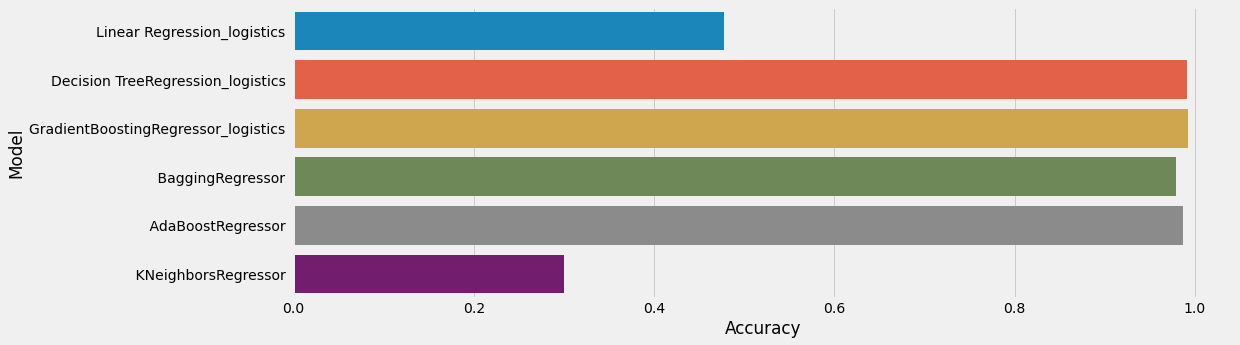

In [173]:
#logistics model
results_df_logis
import seaborn as sns
fig = plt.figure(figsize =(15, 5))

sns.barplot(x="R2 Square", y="Model", data=results_df_logis)
plt.xlabel('Accuracy')


In [190]:
results_df_logis

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression_logistics,10.06,233.57,15.28,0.48
1,Decision TreeRegression_logistics,1.28,4.22,2.06,0.99
2,GradientBoostingRegressor_logistics,1.14,3.34,1.83,0.99
3,BaggingRegressor,1.51,9.46,3.08,0.98
4,AdaBoostRegressor,1.95,6.01,2.45,0.99
5,KNeighborsRegressor,12.14,313.33,17.70,0.30


In [174]:
#sales
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle

X = X.astype(np.float32)

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)

models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)



 29%|███████████████████████▍                                                          | 12/42 [00:00<00:01, 28.12it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:02<00:00, 17.60it/s]

                               Adjusted R-Squared  R-Squared      RMSE  \
Model                                                                    
GradientBoostingRegressor                    0.98       0.98  17369.13   
DecisionTreeRegressor                        0.97       0.97  19054.96   
BaggingRegressor                             0.96       0.96  22943.16   
AdaBoostRegressor                            0.95       0.95  25207.27   
ExtraTreesRegressor                          0.94       0.95  26474.35   
RandomForestRegressor                        0.94       0.94  28665.08   
XGBRegressor                                 0.82       0.83  47254.86   
ExtraTreeRegressor                           0.63       0.65  68661.31   
KNeighborsRegressor                          0.52       0.55  77801.36   
PoissonRegressor                             0.50       0.52  79813.18   
GaussianProcessRegressor                     0.44       0.47  84390.02   
ElasticNet                            

In [175]:
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle

X = X.astype(np.float32)


reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)


 29%|███████████████████████▍                                                          | 12/42 [00:00<00:01, 24.98it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:02<00:00, 17.89it/s]

                               Adjusted R-Squared  R-Squared      RMSE  \
Model                                                                    
GradientBoostingRegressor                    0.98       0.98  17369.13   
DecisionTreeRegressor                        0.97       0.97  19054.96   
BaggingRegressor                             0.96       0.96  22943.16   
AdaBoostRegressor                            0.95       0.95  25207.27   
ExtraTreesRegressor                          0.94       0.95  26474.35   
RandomForestRegressor                        0.94       0.94  28665.08   
XGBRegressor                                 0.82       0.83  47254.86   
ExtraTreeRegressor                           0.63       0.65  68661.31   
KNeighborsRegressor                          0.52       0.55  77801.36   
PoissonRegressor                             0.50       0.52  79813.18   
GaussianProcessRegressor                     0.44       0.47  84390.02   
ElasticNet                            

In [176]:
#squart root
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle

X = X.astype(np.float32)


reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
squreroot_models, predictions = reg.fit(X_train_sqrt, X_test_sqrt, y_train_sqrt, y_test_sqrt)

print(squreroot_models)


 24%|███████████████████▌                                                              | 10/42 [00:00<00:01, 29.00it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:02<00:00, 20.70it/s]

                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
GradientBoostingRegressor                    0.94       0.94  47.30   
RandomForestRegressor                        0.92       0.93  52.74   
XGBRegressor                                 0.92       0.92  54.23   
AdaBoostRegressor                            0.92       0.92  55.39   
DecisionTreeRegressor                        0.91       0.91  58.00   
ExtraTreesRegressor                          0.90       0.91  59.37   
BaggingRegressor                             0.88       0.89  65.73   
ExtraTreeRegressor                           0.75       0.76  96.77   
KNeighborsRegressor                          0.23       0.26 168.80   
LGBMRegressor                                0.09       0.12 183.26   
HistGradientBoostingRegressor                0.09       0.12 183.51   
PoissonRegressor                             0.05       0.08 187.93   
Orthog

# predicting Logistics


In [177]:
#logistics
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle

A = A.astype(np.float32)


reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(A_train, A_test, b_train, b_test)

print(models)


 19%|███████████████▊                                                                   | 8/42 [00:00<00:00, 41.98it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:02<00:00, 17.62it/s]

                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
ExtraTreesRegressor                          1.00       1.00   1.37   
XGBRegressor                                 0.99       0.99   1.73   
DecisionTreeRegressor                        0.99       0.99   1.81   
GradientBoostingRegressor                    0.99       0.99   1.83   
BaggingRegressor                             0.99       0.99   2.01   
RandomForestRegressor                        0.98       0.98   2.88   
ExtraTreeRegressor                           0.96       0.96   3.96   
AdaBoostRegressor                            0.96       0.96   4.03   
KNeighborsRegressor                          0.83       0.84   8.39   
HistGradientBoostingRegressor                0.80       0.81   9.12   
LGBMRegressor                                0.79       0.81   9.26   
PoissonRegressor                             0.62       0.65  12.55   
Orthog